# Portfolio Analysis

Financial Products to be considered:

| Name      | Ticker |
| :----------- | :----------- |
|iShares Global Govt Bond UCITS ETF USD (Dist)| IGLO.L|
|iShares MSCI World SRI UCITS ETF EUR (Acc)|SUSW.L|
|iShares MSCI EM SRI UCITS ETF USD (Dist)|SEMD.AS|
|iShares Physical Gold ETC |IGLN.L|


In [1]:

import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pypfopt 

In [2]:
df = pd.DataFrame()

start = datetime.datetime(2017,8,1)
end = datetime.datetime(2021,2,18) 

Run only one Portfolio Cell:

In [3]:
Portfolio_1 = ['IGLO.L', 'SUSW.L', 'IGLN.L', 'SEMD.AS']

for asset in Portfolio_1:
    df[asset] = web.DataReader(asset, data_source = 'yahoo', start = start, end = end)['Adj Close']

In [ ]:
Portfolio_2 = ['IGLO.L', 'SUSW.L', 'IGLN.L', 'SEMD.AS']

for asset in Portfolio_2:
    df[asset] = web.DataReader(asset, data_source = 'yahoo', start = start, end = end)['Adj Close']

In [5]:
df 

,IGLO.L,SUSW.L,IGLN.L,SEMD.AS
Date,,,,
2017-08-01,81.970001,NaN,2123.000000,NaN
2017-08-02,81.940002,NaN,2110.000000,NaN
2017-08-03,82.669998,NaN,2102.000000,NaN
2017-08-04,82.800003,NaN,2104.000000,NaN
2017-08-07,83.019997,NaN,2101.000000,NaN
...,...,...,...,...
2021-02-12,85.375000,7.78750,29.450001,7.0903
2021-02-15,84.705002,7.85250,29.290001,7.1457
2021-02-16,84.339996,7.80875,29.090000,7.0691


Unweighted Moving Average: 

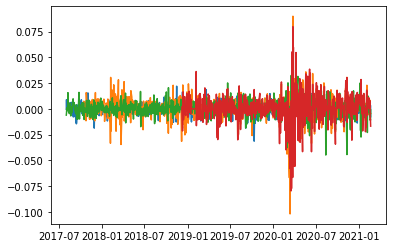

In [6]:
df_d2d_interest = df.pct_change().dropna(how = "all")
df_d2d_interest[df_d2d_interest < -0.6] = np.nan 
plt.plot(df_d2d_interest)

In [ ]:
print(df_d2d_interest.max())
print(df_d2d_interest.min())


In [ ]:
df_d2d_interest.loc["2017-01-01":"2017-12-01"]

In [ ]:
df_d2d_interest.corr()

In [ ]:
return_annual = df_d2d_interest[df_d2d_interest[0] = 2020].mean()*252 # mean times trading days per year
cov_matrix_annual = df_d2d_interest.cov()*252

Exponetially weighted moving average:
 

In [ ]:
## Exponentially Weighted covariance matrix
pypfopt.risk_models.exp_cov

In [ ]:
print(return_annual)
print(cov_matrix_annual)

In [ ]:
### Portfolio1
num_portfolio = 100000

p_weights = []
p_return = []
p_vol = []
p_sharpe = []

for i in range(num_portfolio):

    weights = np.array(np.random.random(4))
    weights = weights / np.sum(weights)
    p_weights.append(weights)

    expected_return = np.sum((return_annual * weights))
    p_return.append(expected_return)

    expected_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_annual,weights)))
    p_vol.append(expected_volatility)

    sharpe = expected_return / expected_volatility
    p_sharpe.append(sharpe)

In [ ]:
data = {"Returns": p_return, "Volatility": p_vol, "Shape Ratio": p_sharpe}

In [ ]:
for counter, symbol in enumerate(df.columns.tolist()):
    data[symbol+"weight"] = [w[counter] for w in p_weights]

portfolios = pd.DataFrame(data)
portfolios["Shape Ratio"].argmax()

In [ ]:
portfolios.loc[[portfolios["Shape Ratio"].argmax()]]